In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.isnull().sum()
# we will get rid of the cabin column, replace the null values in the age column with average age and get rid of the 2 remaining NULL rows

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

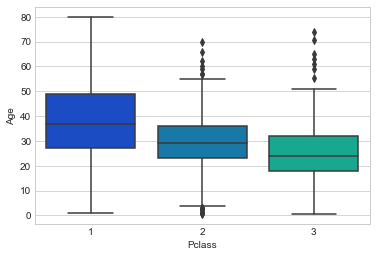

In [8]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

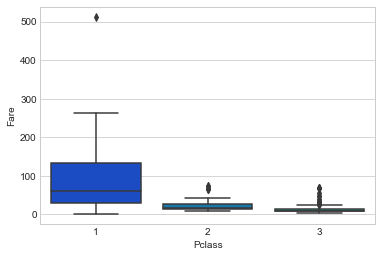

In [9]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Fare',data=test_data,palette='winter')

In [10]:
def avg_age(x):
    age = x[0]
    pclass = x[1]
    if pd.isnull(age):
        
        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24
    
    else:
        return age

In [11]:
def avg_fare(y):
    fare = y[0]
    pclass = y[1]
    if pd.isnull(fare):
        
        if pclass == 1:
            return 70

        elif pclass == 2:
            return 15

        else:
            return 8
        
    else:
        return fare

In [12]:
train_data['Age'] = train_data[['Age','Pclass']].apply(avg_age,axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(avg_age,axis=1)
test_data['Fare'] = test_data[['Fare','Pclass']].apply(avg_fare,axis=1)

In [13]:
train_data.drop('Cabin', axis = 1,inplace = True)
test_data.drop('Cabin', axis = 1,inplace = True)

In [14]:
train_data.dropna(inplace=True)
#test_data.dropna(inplace=True)

In [15]:
# We also have to get change the sex and embark classes and get rid of the name and ticket columns
sex_train = pd.get_dummies(train_data['Sex'],drop_first=True)
embark_train = pd.get_dummies(train_data['Embarked'],drop_first=True)
sex_test = pd.get_dummies(test_data['Sex'],drop_first=True)
embark_test = pd.get_dummies(test_data['Embarked'],drop_first=True)

train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

train_data = pd.concat([train_data,sex_train,embark_train],axis=1)
test_data = pd.concat([test_data,sex_test,embark_test],axis=1)

In [16]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [17]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [18]:
X_train = train_data.drop('Survived',axis=1)
y_train = train_data['Survived']
X_test = test_data

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=600)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
predictions = rfc.predict(X_test)